# Introduction

- The dataset includes information about energy production in various countries on a monthly basis from 2010 to 2022. It can be accessed here [Monthly Electricity Statistics](https://www.kaggle.com/datasets/ccanb23/iea-monthly-electricity-statistics).
- The energy production is measured in gigawatt-hours (GWh) and covers a range of energy products including hydro, wind, solar, geothermal, nuclear, fossil fuels, and others.

## Objectives

The objectives are to analyze and get insights from the data. Also, the idea is to compare the energy production/consumption in Brazil and in other countries.

## Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
import urllib.request

In [11]:
mpl.rc("axes", labelsize=12, titlesize=14)
mpl.rc("figure", figsize=(10,6))

sns.set_style("darkgrid")
palette = sns.color_palette("deep")
blue = palette[0]
orange = palette[1]
green = palette[2]
purple = palette[4]

# 1. Dataset

In [12]:
filename = "data_electricity.csv"
path = os.path.join("Datasets")
download_url = "https://raw.githubusercontent.com/gfacheti/Energy-Production-Analysis/master/"

def fetch_data(url=download_url, path=path, filename=filename):
    if not os.path.isdir(path):
        os.makedirs(path)
    filepath = os.path.join(path, filename)
    if not os.path.isfile(filepath):
        print("Downloading", filename)
        urllib.request.urlretrieve(url + filename, filepath)

fetch_data()

In [13]:
def load_data(filename, path=path):
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path)

In [14]:
data = load_data("data_electricity.csv")

In [15]:
data.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,NaN,0.930108


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181915 entries, 0 to 181914
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   COUNTRY             181915 non-null  object 
 1   CODE_TIME           181915 non-null  object 
 2   TIME                181915 non-null  object 
 3   YEAR                181915 non-null  int64  
 4   MONTH               181915 non-null  int64  
 5   MONTH_NAME          181915 non-null  object 
 6   PRODUCT             181915 non-null  object 
 7   VALUE               181915 non-null  float64
 8   DISPLAY_ORDER       181915 non-null  int64  
 9   yearToDate          181915 non-null  float64
 10  previousYearToDate  164810 non-null  float64
 11  share               181915 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 16.7+ MB


<b> Categorical variables </b>
- COUNTRY
- CODE_TIME
- TIME
- MONTH_NAME
- PRODUCT

<b> Numerical variables </b>
- YEAR
- MONTH
- VALUE
- DISPLAY_ORDER
- yearToDate
- previousYearToDate
- share

In [17]:
# previousYearToDate has missing values, which is reasonable
data.isna().sum()

COUNTRY                   0
CODE_TIME                 0
TIME                      0
YEAR                      0
MONTH                     0
MONTH_NAME                0
PRODUCT                   0
VALUE                     0
DISPLAY_ORDER             0
yearToDate                0
previousYearToDate    17105
share                     0
dtype: int64

In [18]:
print(data["COUNTRY"].unique())
len(data["COUNTRY"].unique())

['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'IEA Total' 'Iceland' 'Ireland' 'Italy' 'Japan' 'Korea' 'Latvia'
 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Norway'
 'OECD Americas' 'OECD Asia Oceania' 'OECD Europe' 'OECD Total' 'Poland'
 'Portugal' 'Republic of Turkiye' 'Slovak Republic' 'Slovenia' 'Spain'
 'Sweden' 'Switzerland' 'United Kingdom' 'United States' 'Colombia'
 'Argentina' 'Brazil' 'Bulgaria' 'Croatia' 'Cyprus' 'India' 'Malta'
 'North Macedonia' 'Romania' 'Serbia' 'Costa Rica']


52

In [19]:
data["PRODUCT"].unique()

array(['Hydro', 'Wind', 'Solar', 'Geothermal', 'Total combustible fuels',
       'Coal', 'Oil', 'Natural gas', 'Combustible renewables',
       'Net electricity production', 'Electricity supplied',
       'Used for pumped storage', 'Distribution losses',
       'Final consumption', 'Renewables', 'Non-renewables', 'Others',
       'Other renewables aggregated', 'Low carbon', 'Fossil fuels',
       'Other combustible non-renewables', 'Not specified',
       'Total imports', 'Total exports', 'Electricity trade', 'Nuclear',
       'Other renewables'], dtype=object)

# 2. Data pre-processing

In [20]:
data.drop(["CODE_TIME", "TIME","DISPLAY_ORDER", "previousYearToDate"], axis=1, inplace=True)
data.rename({"COUNTRY": "country",
             "YEAR": "year", 
             "MONTH": "month",
             "MONTH_NAME": "month_name",
             "PRODUCT": "product", 
             "VALUE": "value"}, axis=1, inplace=True)
data["date"] = pd.to_datetime(data[["year", "month"]].assign(day=1))

data.head()

,country,year,month,month_name,product,value,yearToDate,share,date
0,Australia,2010,1,January,Hydro,990.728,16471.891,0.047771,2010-01-01
1,Australia,2010,1,January,Wind,409.469,4940.909,0.019744,2010-01-01
2,Australia,2010,1,January,Solar,49.216,908.238,0.002373,2010-01-01
3,Australia,2010,1,January,Geothermal,0.083,0.996,0.000004,2010-01-01
4,Australia,2010,1,January,Total combustible fuels,19289.730,214302.969,0.930108,2010-01-01


# 3. Brazil

In [21]:
brazil_data = data.loc[data["country"] == "Brazil"]
brazil_data

,country,year,month,month_name,product,value,yearToDate,share,date
58426,Brazil,2015,1,January,Hydro,34343.374000,355076.900000,0.681045,2015-01-01
58427,Brazil,2015,1,January,Wind,1543.120000,21465.900000,0.030601,2015-01-01
58428,Brazil,2015,1,January,Solar,2.613000,58.652000,0.000052,2015-01-01
58429,Brazil,2015,1,January,Geothermal,0.000000,0.000000,0.000000,2015-01-01
58430,Brazil,2015,1,January,Other renewables,0.000000,0.000000,0.000000,2015-01-01
...,...,...,...,...,...,...,...,...,...
180864,Brazil,2022,12,December,Non-renewables,4230.234781,56127.239051,0.079150,2022-12-01
180865,Brazil,2022,12,December,Others,331.295085,4811.483479,0.006199,2022-12-01
180866,Brazil,2022,12,December,Other renewables aggregated,2286.322968,52527.384791,0.042778,2022-12-01
180867,Brazil,2022,12,December,Low carbon,50604.689534,597142.365510,0.946843,2022-12-01


In [22]:
brazil_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 58426 to 180868
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   country     2340 non-null   object        
 1   year        2340 non-null   int64         
 2   month       2340 non-null   int64         
 3   month_name  2340 non-null   object        
 4   product     2340 non-null   object        
 5   value       2340 non-null   float64       
 6   yearToDate  2340 non-null   float64       
 7   share       2340 non-null   float64       
 8   date        2340 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 182.8+ KB


## 3.1. Data analysis and visualization

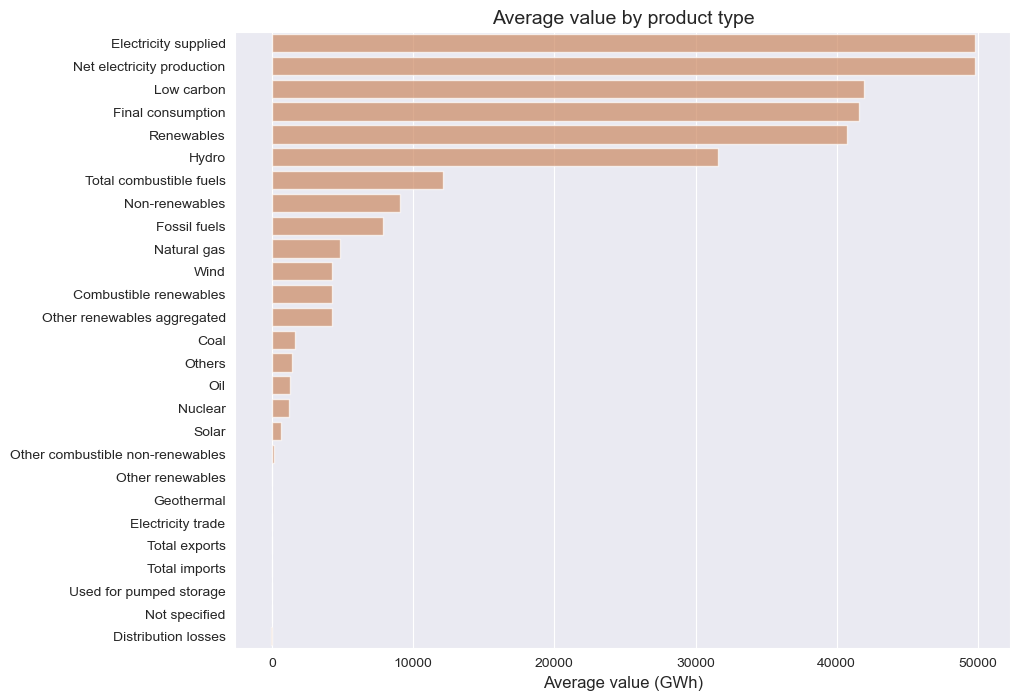

In [23]:
order = brazil_data.groupby("product")["value"].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(data=brazil_data, x="value", y="product", estimator=np.mean, errorbar=None, 
            order=order, color=palette[1], alpha=0.7)
ax.set(ylabel="", xlabel="Average value (GWh)", title="Average value by product type")


plt.show()

### 3.1.1. Annual production

In [24]:
net_production = brazil_data.loc[brazil_data["product"] == "Net electricity production"]
final_consumption = brazil_data.loc[brazil_data["product"] == "Final consumption"]
df_nuclear = brazil_data.loc[brazil_data["product"] == "Nuclear"]
df_renew = brazil_data.loc[brazil_data["product"] == "Renewables"]
df_fossil = brazil_data.loc[brazil_data["product"] == "Fossil fuels"]

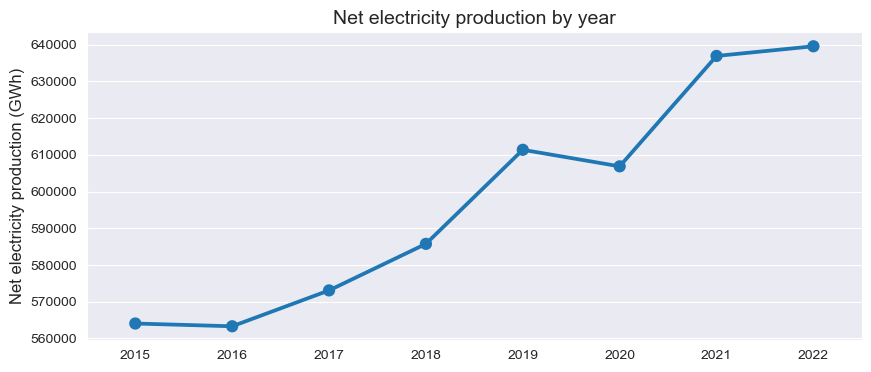

In [25]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.pointplot(data=net_production, x="year", y="value", estimator=np.sum, errorbar=None)
ax.set_ylabel("Net electricity production (GWh)")
ax.set_xlabel("")
ax.set_title("Net electricity production by year")

plt.show()

Energy production is increasing year over year

### 3.1.2. Seasonal variation

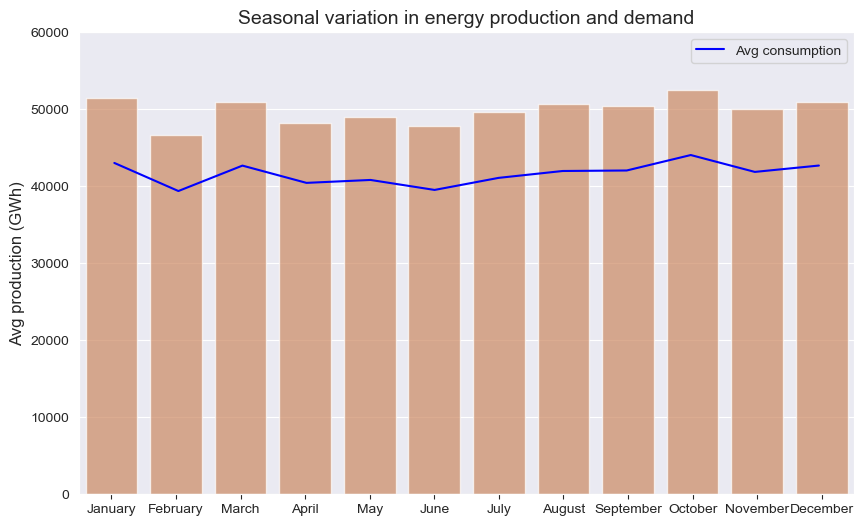

In [26]:
prod_by_month = net_production.groupby("month_name", sort=False)["value"].mean().reset_index()
cons_by_month = final_consumption.groupby("month_name", sort=False)["value"].mean().reset_index()

ax1 = sns.barplot(data=prod_by_month, x="month_name", y="value", color=palette[1], alpha=0.7)
ax1.set_ylim(0, 60000)
ax1.set(title="Seasonal variation in energy production and demand", ylabel="Avg production (GWh)", xlabel="")

ax2 = ax1.twiny()
sns.lineplot(data=cons_by_month, x="month_name", y="value", color="blue", ax=ax2)
ax2.set(xlabel="", xticks=[])
ax2.grid(False)
ax2.legend(["Avg consumption"], loc="upper right")

plt.show()

We can see that February has the lowest electricity production, considering all years. On the other hand, October is the peak of production. <br>
Regarding final consumption, there is no significant variation over the months. But in the warmer months, consumption is slightly higher.

### 3.1.3. Annual variation

In [27]:
def diff(df):
    """
    This function groups a DataFrame by year, sums up the column value and returns the relative difference.
    """
    return ((df.groupby("year")["value"].sum() - df.groupby("year")["value"].sum().values[0]) \
/df.groupby("year")["value"].sum().values[0])*100

In [28]:
diff_cons = diff(net_production)
diff_nuclear = diff(df_nuclear)
diff_renew = diff(df_renew)
diff_fossil = diff(df_fossil)

diff_df = pd.concat([diff_nuclear, diff_cons, diff_renew, diff_fossil], axis=1)
diff_df.columns = ["Nuclear", "Consumption", "Renewables", "Fossil fuels"]

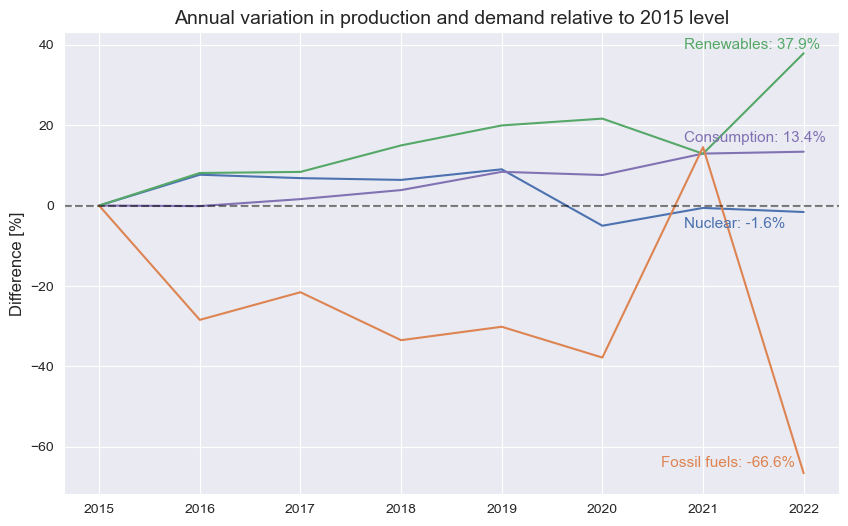

In [29]:
fig, ax = plt.subplots()
sns.lineplot(data=diff_df, palette=[blue,purple,green,orange], dashes=False, ax=ax, legend=False)
plt.axhline(y=0, linestyle="--", color="black", alpha=0.5)
ax.set(ylabel="Difference [%]", xlabel="", title="Annual variation in production and demand relative to 2015 level")

ax.annotate("Nuclear: " + "{:.1%}".format(diff_df["Nuclear"].iloc[-1]/100), xy=(0.8,diff_df["Nuclear"].iloc[-1]-3), 
            xycoords=("axes fraction", "data"), ha="left", va="center", fontsize=11, color=blue)
ax.annotate("Consumption: " + "{:.1%}".format(diff_df["Consumption"].iloc[-1]/100), xy=(0.8,diff_df["Consumption"].iloc[-1]+3.5), 
            xycoords=("axes fraction", "data"), ha="left", va="center", fontsize=11, color=purple)
ax.annotate("Renewables: " + "{:.1%}".format(diff_df["Renewables"].iloc[-1]/100), xy=(0.8,diff_df["Renewables"].iloc[-1]+2), 
            xycoords=("axes fraction", "data"), ha="left", va="center", fontsize=11, color=green)
ax.annotate("Fossil fuels: " + "{:.1%}".format(diff_df["Fossil fuels"].iloc[-1]/100), xy=(0.77,diff_df["Fossil fuels"].iloc[-1]+2.5), 
            xycoords=("axes fraction", "data"), ha="left", va="center", fontsize=11, color=orange)

plt.show()

When comparing 2022 to 2015, renewable production has increased by almost 38%. On the other hand, the energy production from fossil fuels and nuclear has dropped by 67% and 1.6%, respectively - in 2021, there was an increase in fossil fuels, probably because of a drop in hydro production. It will be explained later. The consumption, though, has increased by 13.4%.

In [30]:
filt = ["Renewables", "Nuclear", "Fossil fuels"]

filtered_df = brazil_data[brazil_data["product"].isin(filt)]

share = (filtered_df.groupby(["year", "product"])["value"].sum()/net_production.groupby("year")["value"].sum()).unstack()*100
share.columns = filt
year = share.index
fuel = share.values[:,0]
nuclear = share.values[:,1]
renew = share.values[:,2]

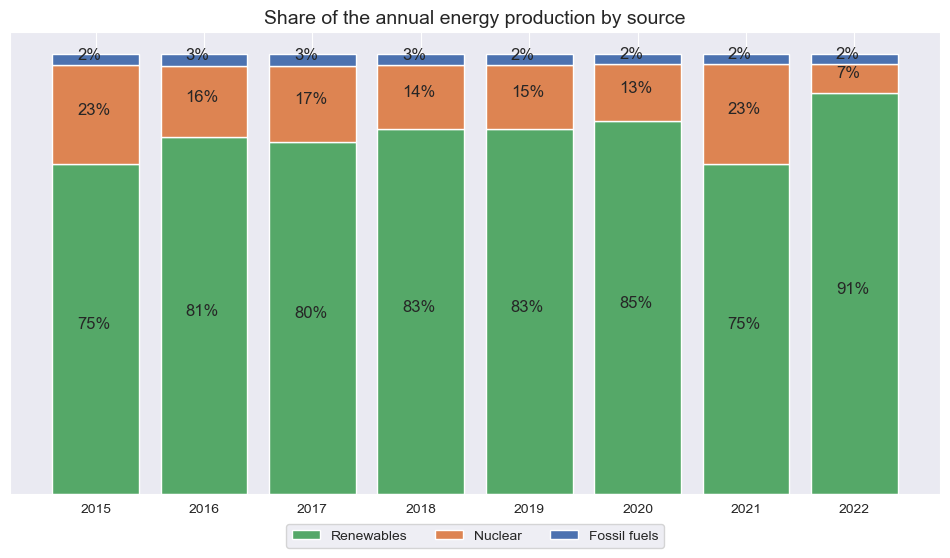

In [31]:
fig, ax = plt.subplots(figsize=(12,6))
plt.bar(share.index, renew, color=green)
plt.bar(share.index, fuel, bottom=renew, color=orange)
plt.bar(share.index, nuclear, bottom=[i+j for i,j in zip(renew, fuel)], color=blue)
plt.legend(share.columns, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=False, 
           ncol=len(filt), fontsize=10)
ax.set_title("Share of the annual energy production by source")
ax.set(yticks=[])

for i, v in enumerate(renew):
    plt.text(year[i] - 0.17, v/2, "{:.0%}".format(v/100), fontsize=12)
for i, v in enumerate(fuel):
    plt.text(year[i] - 0.17, v/2 + renew[i], "{:.0%}".format(v/100), fontsize=12)
for i, v in enumerate(nuclear):
    plt.text(year[i] - 0.17, v/2 + fuel[i] + renew[i], "{:.0%}".format(v/100), fontsize=12)

plt.show()

In 2015, the share of production from renewable sources was about 75%, which was already a great number. After 7 years there was an increase of 16%, totaling 91% of the share.

### 3.1.4. Energy matrix

In [32]:
matrix = ["Wind", "Solar", "Others", "Nuclear", "Natural gas", "Hydro", "Combustible renewables", "Coal"]

df = brazil_data[brazil_data["product"].isin(matrix)]
df

,country,year,month,month_name,product,value,yearToDate,share,date
58426,Brazil,2015,1,January,Hydro,34343.374000,355076.900000,0.681045,2015-01-01
58427,Brazil,2015,1,January,Wind,1543.120000,21465.900000,0.030601,2015-01-01
58428,Brazil,2015,1,January,Solar,2.613000,58.652000,0.000052,2015-01-01
58431,Brazil,2015,1,January,Nuclear,1344.027000,13907.351000,0.026653,2015-01-01
58433,Brazil,2015,1,January,Coal,2478.205000,25381.313000,0.049144,2015-01-01
...,...,...,...,...,...,...,...,...,...
180854,Brazil,2022,12,December,Nuclear,1389.202319,13684.322262,0.025993,2022-12-01
180856,Brazil,2022,12,December,Coal,287.726861,9380.223516,0.005384,2022-12-01
180858,Brazil,2022,12,December,Natural gas,2222.010516,28251.209794,0.041575,2022-12-01
180859,Brazil,2022,12,December,Combustible renewables,2286.322968,52527.384791,0.042778,2022-12-01


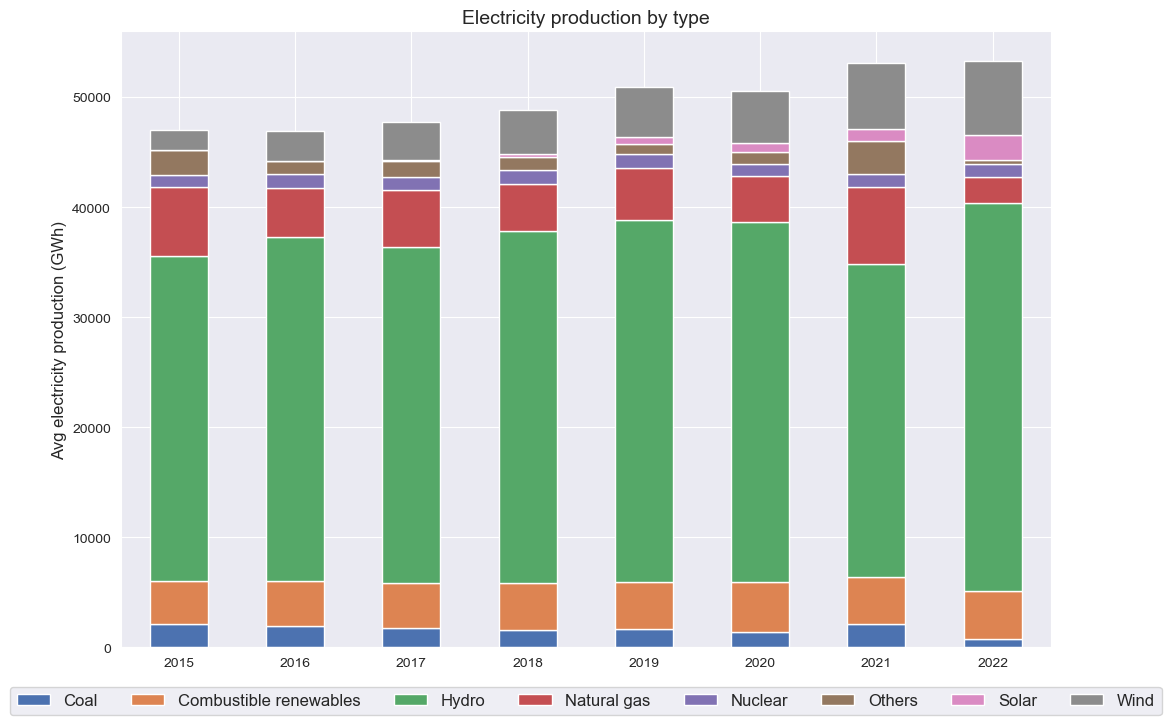

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
df.groupby(["year", "product"])["value"].mean().sort_values(ascending=False).unstack().\
    plot(kind="bar", stacked=True, ax=ax, legend=False, color=palette[:len(matrix)], rot=0, xlabel="",
         ylabel="Avg electricity production (GWh)")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=False, ncol=len(matrix), fontsize=12)
ax.set_title("Electricity production by type")

plt.show()

Hydro is by far responsible for generating more energy. We can also see an increase in Wind and Solar generation. <br>
Let's visualize it better with a pie.

In [34]:
by_type = df.groupby("product")["value"].sum().sort_values(ascending=False)
index = by_type.index

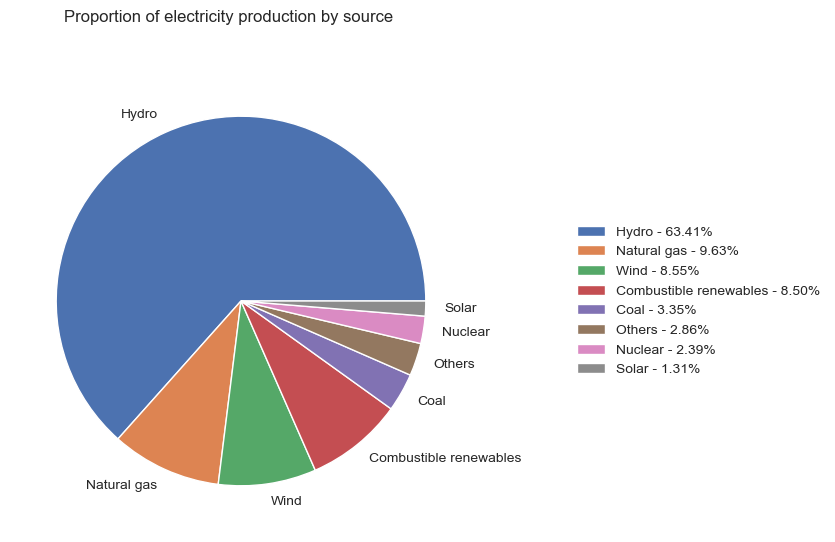

In [35]:
fig, ax = plt.subplots()
plt.suptitle("Proportion of electricity production by source")
plt.pie(x=by_type, labels=index, colors=palette)
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), 
           labels=["{} - {:.2f}%".format(i, j/sum(by_type)*100) for i, j in zip(index, by_type)], frameon=False)

plt.show()

We can see that Hydro is responsible for 63.41% of all production. Another interesting fact is that the third and fourth places are occupied by renewable sources too. 

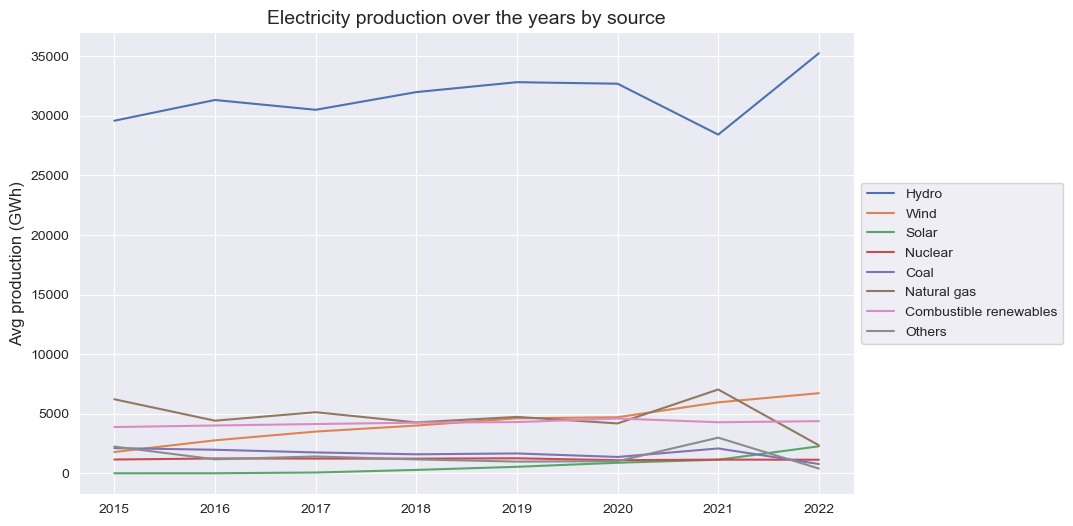

In [36]:
fig, ax = plt.subplots()
sns.lineplot(data=df, x="year", y="value", hue="product", ax=ax, errorbar=None, estimator=np.mean, palette=palette[:len(matrix)])
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set(title="Electricity production over the years by source", ylabel="Avg production (GWh)", xlabel="")

plt.show()

An interesting fact is that when Hydro production drops, like in 2021, it's necessary to use more Natural gas to produce electricity, so the relation is inversely proportional. This explains the drop in energy production from renewable sources in 2021.

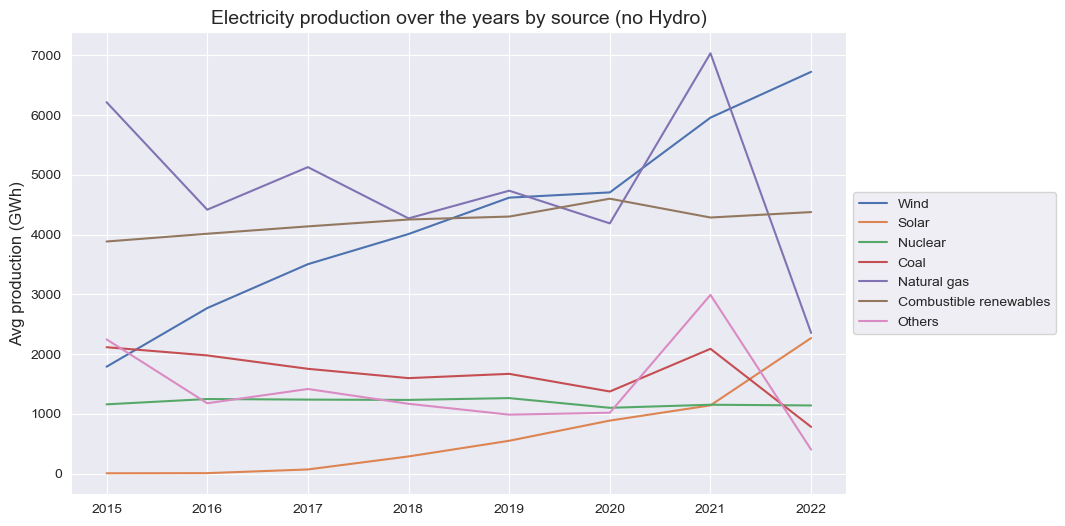

In [37]:
# let's take a better look at it, removing Hydro from the analysis
no_hydro = df.loc[df["product"] != "Hydro"]

fig, ax = plt.subplots()
sns.lineplot(data=no_hydro, x="year", y="value", hue="product", ax=ax, errorbar=None, estimator=np.mean, 
             palette=palette[:len(no_hydro["product"].unique())])
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set(title="Electricity production over the years by source (no Hydro)", ylabel="Avg production (GWh)", xlabel="")

plt.show()

In this plot, we can see how Wind, Solar and Combustible renewables production have increased over the years. In 2022, Wind and Combustible renewables surpassed Natural gas in production.

# 4. Comparing other countries

## 4.1. Removing unwanted data

In [38]:
country_filter = ["OECD Americas", "OECD Asia Oceania", "OECD Europe", "OECD Total", "IEA Total"]

all_countries = data.loc[~data["country"].isin(country_filter)]
all_countries

,country,year,month,month_name,product,value,yearToDate,share,date
0,Australia,2010,1,January,Hydro,990.728000,1.647189e+04,0.047771,2010-01-01
1,Australia,2010,1,January,Wind,409.469000,4.940909e+03,0.019744,2010-01-01
2,Australia,2010,1,January,Solar,49.216000,9.082380e+02,0.002373,2010-01-01
3,Australia,2010,1,January,Geothermal,0.083000,9.960000e-01,0.000004,2010-01-01
4,Australia,2010,1,January,Total combustible fuels,19289.730000,2.143030e+05,0.930108,2010-01-01
...,...,...,...,...,...,...,...,...,...
181910,United States,2022,12,December,Non-renewables,292417.548132,3.355042e+06,0.791164,2022-12-01
181911,United States,2022,12,December,Others,8017.840957,5.393606e+04,0.021693,2022-12-01
181912,United States,2022,12,December,Other renewables aggregated,6133.265943,7.100997e+04,0.016594,2022-12-01
181913,United States,2022,12,December,Low carbon,146425.474534,1.749805e+06,0.396168,2022-12-01


In [39]:
all_countries["country"].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Republic of Turkiye', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'United Kingdom', 'United States',
       'Colombia', 'Argentina', 'Brazil', 'Bulgaria', 'Croatia', 'Cyprus',
       'India', 'Malta', 'North Macedonia', 'Romania', 'Serbia',
       'Costa Rica'], dtype=object)

Looking at the column "country", since it's alphabetically ordered, it seems that some countries were included after 2010.

In [40]:
included = ["Colombia", "Argentina", "Brazil", "Bulgaria", "Croatia", "Cyprus",
       "India", "Malta", "North Macedonia", "Romania", "Serbia",
       "Costa Rica"]

unique = all_countries[["country", "year"]].drop_duplicates()
with pd.option_context("display.max_rows", None):
    display(unique.loc[unique["country"].isin(included)])

,country,year
46557,Colombia,2014
58330,Argentina,2015
58426,Brazil,2015
58449,Bulgaria,2015
58517,Colombia,2015
58538,Croatia,2015
58560,Cyprus,2015
58811,India,2015
58997,Malta,2015
59087,North Macedonia,2015


Most countries were included in 2015, but Colombia was included in 2014, and Costa Rica only in 2021. <br>
To get a good analysis, it's essential to filter the DataFrame down. So I'll maintain only the countries present in the dataset since 2010.

In [41]:
clean_df = all_countries.groupby("country").filter(lambda x: x["year"].min() <= 2010 and x["year"].max() <= 2022)
clean_df

,country,year,month,month_name,product,value,yearToDate,share,date
0,Australia,2010,1,January,Hydro,990.728000,1.647189e+04,0.047771,2010-01-01
1,Australia,2010,1,January,Wind,409.469000,4.940909e+03,0.019744,2010-01-01
2,Australia,2010,1,January,Solar,49.216000,9.082380e+02,0.002373,2010-01-01
3,Australia,2010,1,January,Geothermal,0.083000,9.960000e-01,0.000004,2010-01-01
4,Australia,2010,1,January,Total combustible fuels,19289.730000,2.143030e+05,0.930108,2010-01-01
...,...,...,...,...,...,...,...,...,...
181910,United States,2022,12,December,Non-renewables,292417.548132,3.355042e+06,0.791164,2022-12-01
181911,United States,2022,12,December,Others,8017.840957,5.393606e+04,0.021693,2022-12-01
181912,United States,2022,12,December,Other renewables aggregated,6133.265943,7.100997e+04,0.016594,2022-12-01
181913,United States,2022,12,December,Low carbon,146425.474534,1.749805e+06,0.396168,2022-12-01


In [42]:
print(clean_df["country"].unique())
len(clean_df["country"].unique())

['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'Ireland' 'Italy' 'Japan' 'Korea' 'Latvia' 'Lithuania'
 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Norway' 'Poland'
 'Portugal' 'Republic of Turkiye' 'Slovak Republic' 'Slovenia' 'Spain'
 'Sweden' 'Switzerland' 'United Kingdom' 'United States']


35

## 4.2. Data analysis and visualization

In [43]:
net_production = clean_df.loc[clean_df["product"] == "Net electricity production"]
final_consumption = clean_df.loc[clean_df["product"] == "Final consumption"]
df_nuclear = clean_df.loc[clean_df["product"] == "Nuclear"]
df_renew = clean_df.loc[clean_df["product"] == "Renewables"]
df_fossil = clean_df.loc[clean_df["product"] == "Fossil fuels"]

### 4.2.1. Seasonal variarion

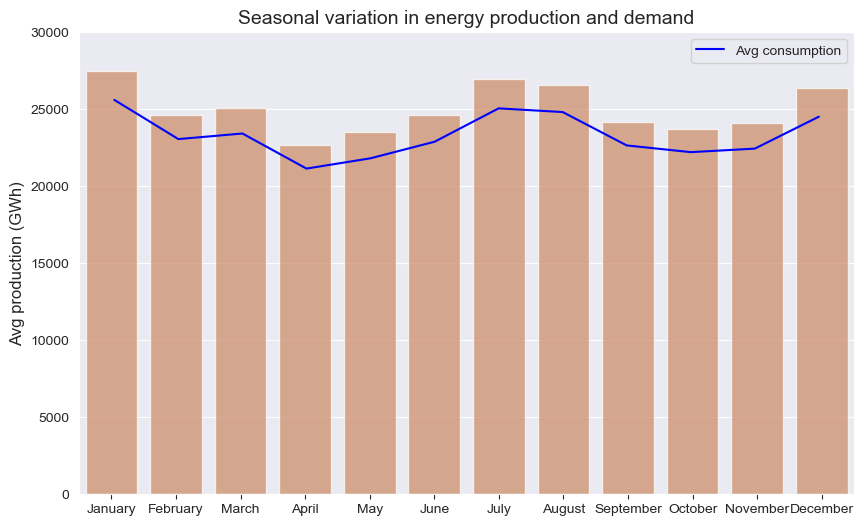

In [44]:
month_net = net_production.groupby("month_name", sort=False)["value"].mean().reset_index()
month_cons = final_consumption.groupby("month_name", sort=False)["value"].mean().reset_index()

ax1 = sns.barplot(data=month_net, x="month_name", y="value", color=orange, alpha=0.7)
ax1.set(title="Seasonal variation in energy production and demand", ylabel="Avg production (GWh)", xlabel="")
ax1.set_ylim(0, 30000)

ax2 = ax1.twiny()
sns.lineplot(data=month_cons, x="month_name", y="value", ax=ax2, color="blue")
ax2.set(xlabel="", xticks=[])
ax2.legend(["Avg consumption"], loc="upper right")

plt.show()

Looking at the plot, we can see that energy demand is higher during winter and summer (in both hemispheres), and production tracks energy demand. <br>
Let's take a look at how the demand changed over the years as well.

### 4.2.2. Annual variation 

In [45]:
diff_cons = diff(net_production)
diff_nuclear = diff(df_nuclear)
diff_renew = diff(df_renew)
diff_fossil = diff(df_fossil)

diff_df = pd.concat([diff_nuclear, diff_cons, diff_renew, diff_fossil], axis=1)
diff_df.columns = ["Nuclear", "Consumption", "Renewables", "Fossil fuels"]

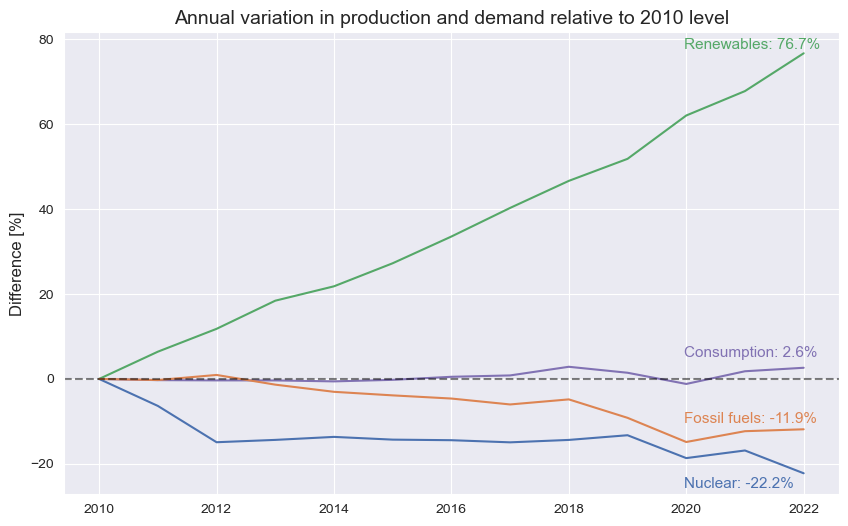

In [46]:
fig, ax = plt.subplots()
sns.lineplot(data=diff_df, palette=[blue,purple,green,orange], dashes=False, ax=ax, legend=False)
plt.axhline(y=0, linestyle="--", color="black", alpha=0.5)
ax.set(ylabel="Difference [%]", xlabel="", title="Annual variation in production and demand relative to 2010 level")

ax.annotate("Nuclear: " + "{:.1%}".format(diff_df["Nuclear"].iloc[-1]/100), xy=(0.8,diff_df["Nuclear"].iloc[-1]-2.5), 
            xycoords=("axes fraction", "data"), ha="left", va="center", fontsize=11, color=blue)
ax.annotate("Consumption: " + "{:.1%}".format(diff_df["Consumption"].iloc[-1]/100), xy=(0.8,diff_df["Consumption"].iloc[-1]+3.5), 
            xycoords=("axes fraction", "data"), ha="left", va="center", fontsize=11, color=purple)
ax.annotate("Renewables: " + "{:.1%}".format(diff_df["Renewables"].iloc[-1]/100), xy=(0.8,diff_df["Renewables"].iloc[-1]+2), 
            xycoords=("axes fraction", "data"), ha="left", va="center", fontsize=11, color=green)
ax.annotate("Fossil fuels: " + "{:.1%}".format(diff_df["Fossil fuels"].iloc[-1]/100), xy=(0.8,diff_df["Fossil fuels"].iloc[-1]+2.5), 
            xycoords=("axes fraction", "data"), ha="left", va="center", fontsize=11, color=orange)

plt.show()

When comparing 2022 to 2010, renewable production has had a great leap, almost a 77% increase. On the other hand, the energy production from fossil fuels and nuclear has dropped by 12% and 22%, respectively. The consumption, though, it's almost the same, with an increase of 2.6%.

In [47]:
filtered_df = clean_df[clean_df["product"].isin(filt)]

share = (filtered_df.groupby(["year", "product"])["value"].sum()/net_production.groupby("year")["value"].sum()).unstack()*100
share.columns = filt
year = share.index
fuel = share.values[:,0]
nuclear = share.values[:,1]
renew = share.values[:,2]

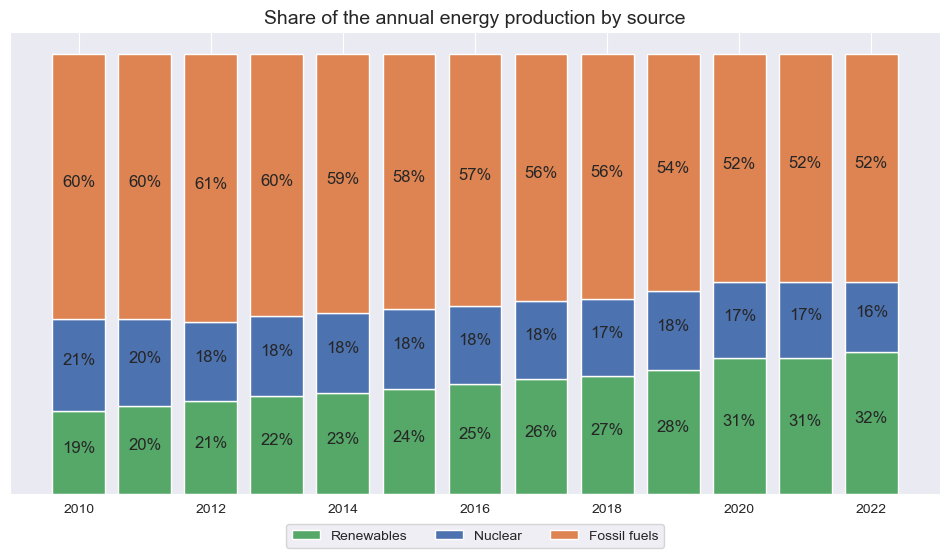

In [48]:
fig, ax = plt.subplots(figsize=(12,6))
plt.bar(share.index, renew, color=green)
plt.bar(share.index, nuclear, bottom=renew, color=blue)
plt.bar(share.index, fuel, bottom=[i+j for i,j in zip(renew, nuclear)], color=orange)
plt.legend(share.columns, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=False, 
           ncol=len(matrix), fontsize=10)
ax.set_title("Share of the annual energy production by source")
ax.set(yticks=[])

for i, v in enumerate(renew):
    plt.text(year[i] - 0.25, v/2, "{:.0%}".format(v/100), fontsize=12)
for i, v in enumerate(nuclear):
    plt.text(year[i] - 0.25, v/2 + renew[i], "{:.0%}".format(v/100), fontsize=12)
for i, v in enumerate(fuel):
    plt.text(year[i] - 0.25, v/2 + nuclear[i] + renew[i], "{:.0%}".format(v/100), fontsize=12)

plt.show()

In 2010, the share of production from renewable sources was lower than 20%. After 12 years there was an increase of 13%, which is relevant, but not how expected. If renewable energy production continues to expand at this pace, gaining a 1% share per year on average, the share of total energy production will reach 50% by 2040.

### 4.2.3. Breakdown by country

In [49]:
group = (filtered_df.groupby(["country", "year", "product"])["value"].sum()/net_production.groupby(["country", "year"])["value"].sum()).unstack()*100
group.reset_index(inplace=True)
new_df = pd.melt(group, id_vars=["country", "year"], value_vars=["Renewables", "Nuclear", "Fossil fuels"], var_name="product", value_name="value")
breakdown = new_df.loc[new_df["year"].isin([2010,2022])].fillna(0)
product = ["Nuclear", "Fossil fuels", "Renewables"]

In [50]:
now = "year == 2022"
then = "year == 2010"

renew_rank = breakdown.loc[(breakdown["product"] == "Renewables") & (breakdown["value"] != 0)].sort_values("value", ascending=False)
nuclear_rank = breakdown.loc[(breakdown["product"] == "Nuclear") & (breakdown["value"] != 0)].sort_values("value", ascending=False)
fossil_rank = breakdown.loc[(breakdown["product"] == "Fossil fuels") & (breakdown["value"] != 0)].sort_values("value", ascending=False)

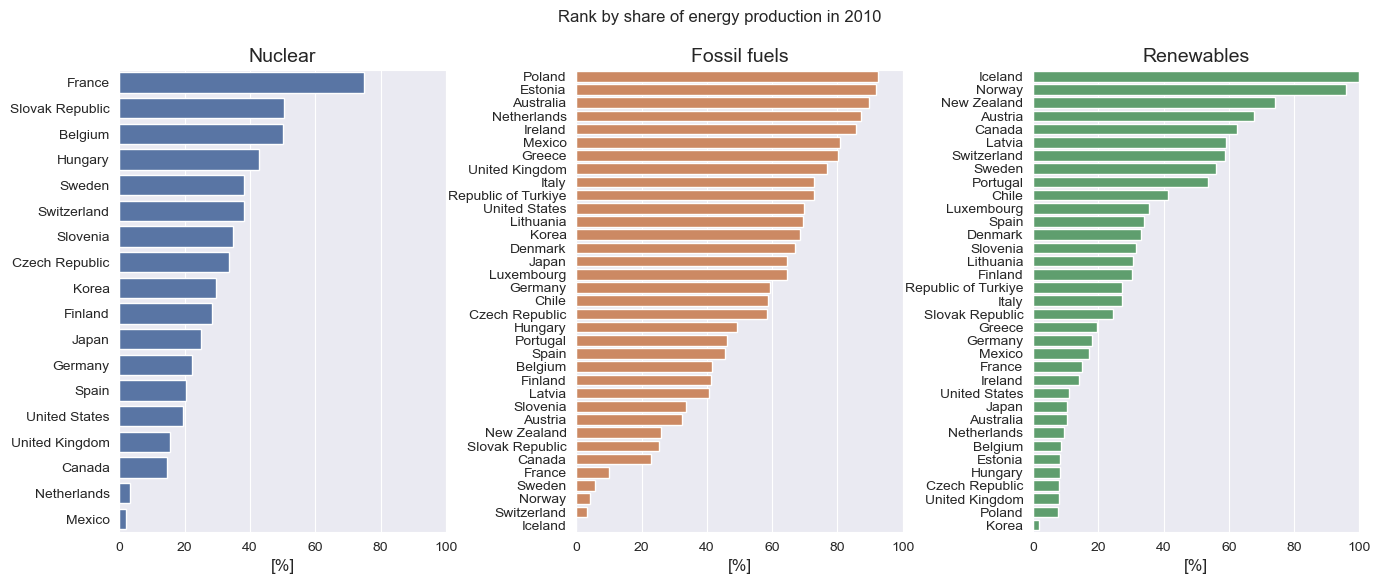

In [51]:
fig, axes = plt.subplots(ncols=3, figsize=(16,6))

for i, df in enumerate([nuclear_rank, fossil_rank, renew_rank]):
    sns.barplot(x="value", y="country", data=df.query(then), ax=axes[i], color=palette[i])
    axes[i].set(xlim=(0,100), ylabel="", xlabel="[%]")
    axes[i].set_title(df["product"].unique()[0])

fig.suptitle("Rank by share of energy production in 2010")
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

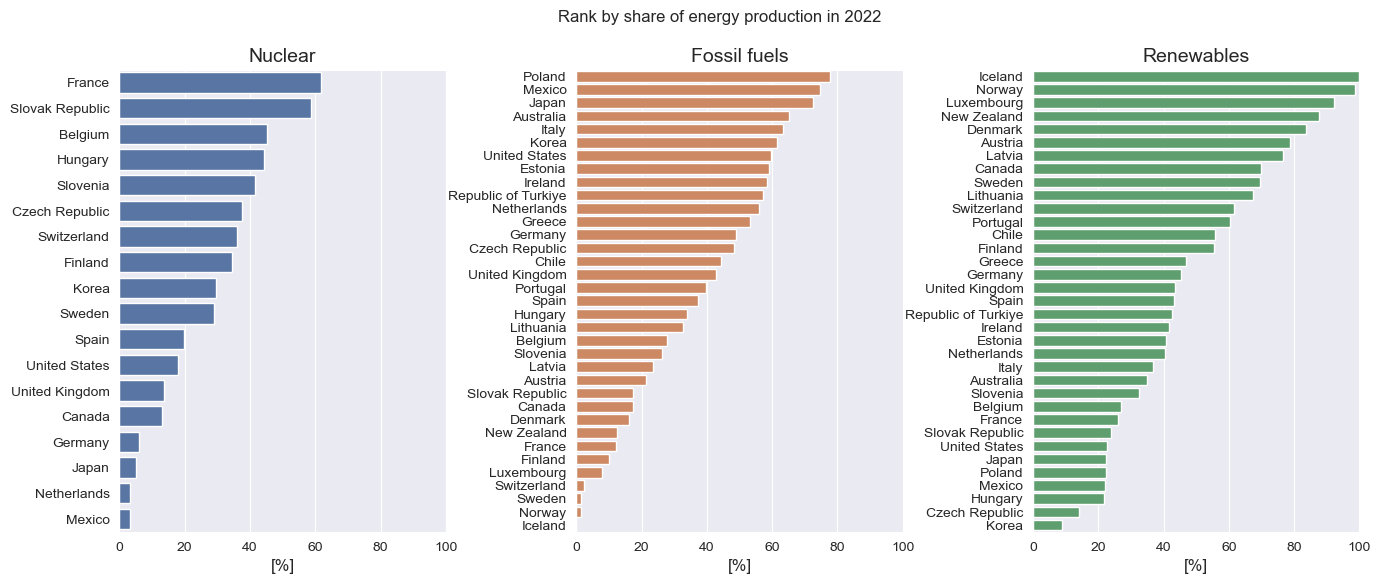

In [52]:
fig, axes = plt.subplots(ncols=3, figsize=(16,6))

for i, df in enumerate([nuclear_rank, fossil_rank, renew_rank]):
    sns.barplot(x="value", y="country", data=df.query(now), ax=axes[i], color=palette[i])
    axes[i].set(xlim=(0,100), ylabel="", xlabel="[%]")
    axes[i].set_title(df["product"].unique()[0])

fig.suptitle("Rank by share of energy production in 2022")
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

In [53]:
nuclear_diff = (nuclear_rank.query(now)[["country", "value"]].set_index("country") - nuclear_rank.query(then)[["country", "value"]].set_index("country")).sort_values("value", ascending=False)
renew_diff = (renew_rank.query(now)[["country", "value"]].set_index("country") - renew_rank.query(then)[["country", "value"]].set_index("country")).sort_values("value", ascending=False)
fossil_diff = (fossil_rank.query(now)[["country", "value"]].set_index("country") - fossil_rank.query(then)[["country", "value"]].set_index("country")).sort_values("value", ascending=False)

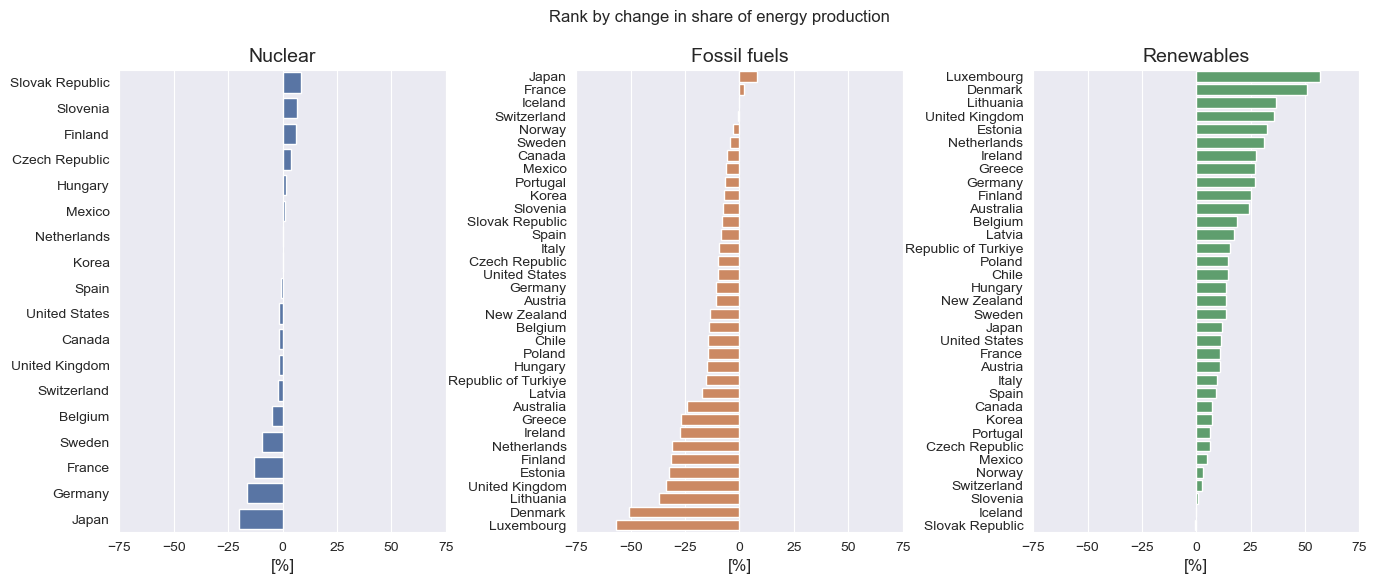

In [54]:
fig, axes = plt.subplots(ncols=3, figsize=(16,6))

for i, df in enumerate([nuclear_diff, fossil_diff, renew_diff]):
    sns.barplot(x="value", y=df.index, data=df, ax=axes[i], color=palette[i])
    axes[i].set(xlim=(-75,75), ylabel="", xlabel="[%]")
    axes[i].set_title(product[i])

fig.suptitle("Rank by change in share of energy production")
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

- Almost 100% of the energy production in Iceland and Norway comes from renewable sources.
- The change in the share of energy production is remarkable when we look at fossil fuels and renewables. 
    - Just Japan and France have increased their use of fossil fuels. 
    - The rest of the countries have expanded their renewable share by a lot (Luxembourg and Denmark by over 50%!).
- Just a few countries have expanded their use of nuclear sources. 